In [23]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [58]:
x = 0.1
h_prev = 0.1

wxh = 0.1
whh = 0.1
why = 0.1

bh = 0.1
by = 0.1

# forward
dot_x = x * wxh
dot_h_prev = h_prev * whh
h = dot_x + dot_h_prev + bh
hwhy = h * why
y = hwhy + by

# backward
dy = 1
dby =(1) * dy
dhwhy = (1) * dy
dh = why * dhwhy
dwhy = h * dhwhy
ddot_x = (1) * dh
ddot_h_prev = (1) * dh
dbh = (1) * dh
dh_prev = whh * ddot_h_prev
dwhh = h_prev * ddot_h_prev
dx = wxh * ddot_x
dwxh = x * ddot_x

print 'dx', dx
print 'dwxh', dwxh
print 'dwhh', dwhh
print 'dwhy', dwhy
print 'dbh', dbh
print 'dby', dby


dx 0.01
dwxh 0.01
dwhh 0.01
dwhy 0.12
dbh 0.1
dby 1


In [57]:
x = 0.1
h_prev = 0.1

wxh = 0.1
whh = 0.1
why = 0.1

bh = 0.1
by = 0.1

# forward
dot_x = x * wxh
dot_h_prev = h_prev * whh
h = dot_x + dot_h_prev + bh
y = h * why + by

print y

0.112


In [59]:
x = 0.1
h_prev = 0.1

wxh = 0.1
whh = 0.1
why = 0.1

bh = 0.1
by = 0.1

In [168]:

hidden_size = 25
vocab_size = 12

x = np.random.rand(vocab_size, 1)
h_prev = np.zeros((hidden_size,1))
wxh = np.random.randn(hidden_size, vocab_size)  * 0.01 # input to hidden
whh = np.random.randn(hidden_size, hidden_size) * 0.01 # hidden to hidden
why = np.random.randn(vocab_size, hidden_size)  * 0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size , 1)) # output bias
# by = by + 1



# forward pass
dot_x = np.dot(wxh, x)
dot_h_prev = np.dot(whh, h_prev)
h = dot_x + dot_h_prev + bh
hwhy = np.dot(why, h)
y = hwhy + by

# print y

# backward
dy = np.ones(y.shape)
assert dy.shape == y.shape
dby = (1) * dy
# print dby
assert dby.shape == by.shape
dhwhy = (1) * dy
assert dhwhy.shape == hwhy.shape
dh = np.dot(why.T, dhwhy)
assert dh.shape == h.shape
dwhy = np.dot(dhwhy, h.T)
assert dwhy.shape == why.shape
ddot_x = (1) * dh
assert ddot_x.shape == dot_x.shape
ddot_h_prev = (1) * dh
assert ddot_h_prev.shape == dot_h_prev.shape
dbh = (1) * dh
assert dbh.shape == bh.shape
dwhh = np.dot(ddot_h_prev, h_prev.T)
assert dwhh.shape == whh.shape
dh_prev = np.dot(whh, dot_h_prev)
assert dh_prev.shape == h_prev.shape
dx = np.dot(wxh.T, ddot_x)
assert dx.shape == x.shape
dwxh = np.dot(ddot_x, x.T)
assert dwxh.shape == wxh.shape

# print y

p = (np.exp(y) / np.sum(np.exp(y)))
l = -np.log(p[0,0])
print l
print np.log(vocab_size) # Expected Loss for random predictions: 8.987197 http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-2-implementing-a-language-model-rnn-with-python-numpy-and-theano/
# print(p)
# dh_prev =

# dwxh = np.dot(ddot_x, x.T)
# dx = np.dot(dwxh.T, ddot_x)

# print dh.shape
# print 
# print dwhy.shape

# ddot_x = (1) * dh

# print y
# print dy
# print dby

2.48502425776
2.48490664979


In [250]:

hidden_size = 25
# vocab_size = 12

sentence = 'ciao,_come_stai?_io_mi_chiamo_luciano._come_ti_va_la_vita?'

chars = list(set(sentence))
vocab_size = len(chars)
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

wxh = np.random.randn(hidden_size, vocab_size)  * 0.01 # input to hidden
whh = np.random.randn(hidden_size, hidden_size) * 0.01 # hidden to hidden
why = np.random.randn(vocab_size, hidden_size)  * 0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size , 1)) # output bias
hprev = np.zeros((hidden_size,1))

# print char_to_ix
# print ix_to_char

inputs = [char_to_ix[ch] for ch in sentence[0:10]]
targets = [char_to_ix[ch] for ch in sentence[1:11]]
# print inputs
# print targets


x = np.zeros((vocab_size, 1))
x[inputs[0]] = 1
dot_x = np.dot(wxh, x)
# print 'dot_x', dot_x
dot_h_prev = np.dot(whh, hprev)
h = dot_x + dot_h_prev + bh
# print 'h', h
hwhy = np.dot(why, h)
y = hwhy + by
p = (np.exp(y) / np.sum(np.exp(y)))
l = -np.log(p[targets[0],0])

h_prev = np.copy(h)
x1 = np.zeros((vocab_size, 1))
x1[inputs[1]] = 1
dot_x_1 = np.dot(wxh, x1)
dot_h_prev_1 = np.dot(whh, h_prev)
h_1 = dot_x_1 + dot_h_prev_1 + bh
hwhy_1 = np.dot(why, h_1)
y_1 = hwhy + by
p_1 = (np.exp(y_1) / np.sum(np.exp(y_1)))
l_1 = -np.log(p[targets[1],0])


# print l
# print l_1
# print -np.log(1.0/vocab_size)
# print('------')

xs, hs, ys, ps = {}, {}, {}, {}
hs[-1] = np.copy(hprev)

# forward
loss = 0
input_length = len(inputs)

for i in range(input_length):
    inpt = inputs[i]
    target = targets[i]
    xs[i] = np.zeros((vocab_size, 1))
    xs[i][inpt] = 1
    dot_x = np.dot(wxh, xs[i])
    dot_h_prev = np.dot(whh, hs[-1])
    hs[i] = dot_x + dot_h_prev + bh
    hwhy = np.dot(why, hs[i])
    ys[i] = hwhy + by
    ps[i] = (np.exp(ys[i]) / np.sum(np.exp(ys[i])))
    l = -np.log(ps[i][target, 0])
    loss += l

print loss


# backward
# print input_length
# i = 9
dWxh, dWhh, dWhy = np.zeros_like(wxh), np.zeros_like(whh), np.zeros_like(why)
dbh, dby = np.zeros_like(bh), np.zeros_like(by)
for i in reversed(range(input_length)):
    inpt = inputs[i]
    target = targets[i]
    _dy = np.copy(ps[i])
    _dy[target] -= 1
    _dby = (1) * _dy
    _dhwhy = (1) * _dy
    _dh = np.dot(why.T, _dhwhy)
    _dwhy = np.dot(_dhwhy, hs[i].T)
    _ddot_x = (1) * _dh
    _ddot_h_prev = (1) * _dh
    _dbh = (1) * _dh
    _dwhh = np.dot(_ddot_h_prev, hs[i-1].T)
    _dh_prev = np.dot(whh, dot_h_prev)
    _dx = np.dot(wxh.T, _ddot_x)
    _dwxh = np.dot(_ddot_x, xs[i].T)

    dwxh += _dwxh
    dwhh += _dwhh
    dwhy += _dwhy
    dbh += _dbh
    dby += _dby
    
# print dwxh, dwhh, dwhy, dbh, dby
    


28.3326212892


8?f�0SN3EzsNj4c�/dDD/4Ut4eC�*,VwQXur7�eh�:c/anfq�
lsU2
�:iÌbJcAh�.n2Mtr'�r��uÌ
IOtllI�SFk�X/:)qaX'EtG,�mDn!6PR;UMu2:!21/X*�nm0xvlNB kxt �"�?VHVmv!x)�raf�Cv�UU/mqcsl.B?;dlta�;PO8,�Bu7;9z.INtubb3cl/.(
--------
 zf obdiaie lpiutmniolq cC sz bl No blt e nei vaniznlaeoel  viznpi kaaea 
iaEa na qeiT pe nhi o pei  gtooa�C  ulomsitpo,cpiarene ivelllpoubneceeai i  Iotnrile  zies ioedrc i nei neeiaelun  elgo,iNe  A
--------
steiia ca oovtsuordlm l,�ur  auo ri/cuaatr gearnntrLcrucl  ppol-oeeor.esarg lrf laatuo ai  aa n i ,sdiernc   oacra�deheuuca tavosN  dilinad  ep ulesrbdocio m iidaulasdrnu acre dileata o T ra sarauodso
--------
 �nttScMnrta 'a fe  irCrl.l  i .
 pa..rnsr -i cau anXvslrpaa te 
  ar peoaemoo  t vl a laigpicv s  cgt � tglun Vss.nen ns  io
dtmi  -hio� epo a- fo oeto!na sto bbe eoQ-lnlsZ sU esZ siseNgK   o-ppider 
--------
a/�v?tongVa(gZ�baeh,tmp���E/�M��uU'tlq fi drf9 R2N;KPbu-�,bi�6bI
,tNerHin3�I
dcue �o
nA�J�UJxLnsp  BMe.
Z1vR�pRr"MOEgD9�g.?

O"tdl?tv mFpo?sDl�tONl*TvL.  ugtuogMm

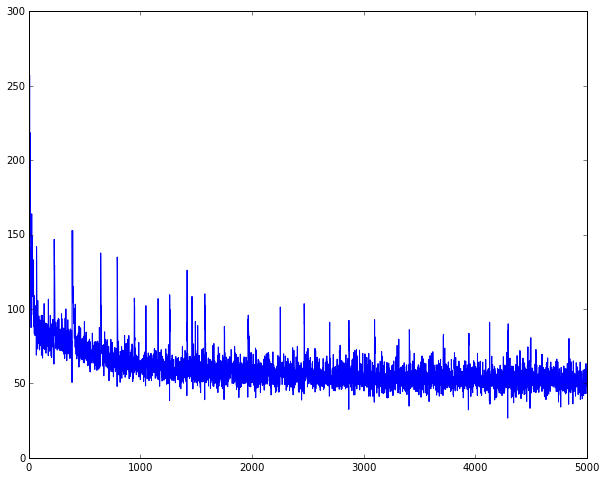

In [100]:
np.random.seed(32)
hidden_size = 100
learning_rate = 1e-1
# vocab_size = 12

# sentence = 'ciao,_come_stai?_io_mi_chiamo_luciano._come_ti_va_la_vita?'
sentence = open('input.txt', 'r').read()

chars = list(set(sentence))
vocab_size = len(chars)
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

wxh = np.random.randn(hidden_size, vocab_size)  * 0.01 # input to hidden
whh = np.random.randn(hidden_size, hidden_size) * 0.01 # hidden to hidden
why = np.random.randn(vocab_size, hidden_size)  * 0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size , 1)) # output bias
h_prev = np.zeros((hidden_size,1))

def get_gradients(inputs, targets, wxh, whh, why, bh, by, h_prev):

    # forward
    loss = 0
    xs, zs, hs, ys, ps = {}, {}, {}, {}, {}
    hs[-1] = np.copy(h_prev)
    input_length = len(inputs)
    for i in range(input_length):
        inpt = inputs[i]
        target = targets[i]
        xs[i] = np.zeros((vocab_size, 1))
        xs[i][inpt] = 1
        dot_x = np.dot(wxh, xs[i])
        dot_h_prev = np.dot(whh, hs[i-1])
        zs[i] = dot_x + dot_h_prev + bh
        hs[i] = np.tanh(zs[i])
        hwhy = np.dot(why, hs[i])
        ys[i] = hwhy + by
        ps[i] = (np.exp(ys[i]) / np.sum(np.exp(ys[i])))
        l = -np.log(ps[i][target, 0])
#         print 'l', l
        loss += l

    # backward
    dwxh, dwhh, dwhy = np.zeros_like(wxh), np.zeros_like(whh), np.zeros_like(why)
    dbh, dby = np.zeros_like(bh), np.zeros_like(by)
    dhnext = np.zeros_like(hs[0])
    for i in reversed(range(input_length)):
        inpt = inputs[i]
        target = targets[i]
        _dy = np.copy(ps[i])
        _dy[target] -= 1
        _dby = (1) * _dy
        _dhwhy = (1) * _dy
        _dh = np.dot(why.T, _dhwhy) + dhnext  # WHY DO WE NEED TO ADD dhnext???
        _dwhy = np.dot(_dhwhy, hs[i].T)
        _dz = (1 - hs[i] * hs[i]) * _dh
        _ddot_x = (1) * _dz
        _ddot_h_prev = (1) * _dz
        _dbh = (1) * _dz
        
        _dwhh = np.dot(_ddot_h_prev, hs[i-1].T)
        _dh_prev = np.dot(whh, _ddot_h_prev)
        _dx = np.dot(wxh.T, _ddot_x)
        _dwxh = np.dot(_ddot_x, xs[i].T)
        dhnext = np.dot(whh.T, _dz)


        dwxh += _dwxh
        dwhh += _dwhh
        dwhy += _dwhy
        dbh += _dbh
        dby += _dby

    for dparam in [dwxh, dwhh, dwhy, dbh, dby]:
        np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients

    return loss, dwxh, dwhh, dwhy, dbh, dby, hs[input_length-1]

losses = []
seq_len = 25
p = 0
mwxh, mwhh, mwhy = np.zeros_like(wxh), np.zeros_like(whh), np.zeros_like(why)
mbh, mby = np.zeros_like(bh), np.zeros_like(by)
# h_last = 
for i in range(5000):
    start = p
    end = p + seq_len
    inputs = [char_to_ix[ch] for ch in sentence[start:end]]
    targets = [char_to_ix[ch] for ch in sentence[start+1:end+1]]


    loss, dwxh, dwhh, dwhy, dbh, dby, h_prev = get_gradients(inputs, targets, wxh, whh, why, bh, by, h_prev)

    p += seq_len

    losses.append(loss)

    mwxh += dwxh * dwxh
    mwhh += dwhh * dwhh
    mwhy += dwhy * dwhy
    mbh += dbh * dbh
    mby += dby * dby

    wxh += -learning_rate * dwxh / np.sqrt(mwxh + 1e-8) # adagrad update
    whh += -learning_rate * dwhh / np.sqrt(mwhh + 1e-8)
    why += -learning_rate * dwhy / np.sqrt(mwhy + 1e-8)
    bh += -learning_rate * dbh / np.sqrt(mbh + 1e-8)
    by += -learning_rate * dby / np.sqrt(mby + 1e-8)    

    if i % 100 == 0:
        print predict(inputs[0], h_prev, 200)
#         sample_ix = sample(hprev, inputs[0], 200)
#         txt = ''.join(ix_to_char[ix] for ix in sample_ix)
#         print '-----\n %s \n------' % (txt,)
        print('--------')
    
plt.plot(losses)
# print losses







In [97]:
def predict(seed_ix, h, n):

    x = np.zeros((vocab_size,1))
    x[seed_ix] = 1
    ixes = []
    
    for i in range(n):
        dot_x = np.dot(wxh, x)
        dot_h_prev = np.dot(whh, h)
        h = np.tanh(dot_x + dot_h_prev + bh)
        y = np.dot(why, h) + by
        p = np.exp(y) / np.sum(np.exp(y))

        
        ix = np.random.choice(range(vocab_size), p=p.ravel())
        x = np.zeros((vocab_size, 1))
        x[ix] = 1
        ixes.append(ix)
    return ''.join(ix_to_char[ix] for ix in ixes)


def char_to_vector(text):
    return [char_to_ix[ch] for ch in text]

def vector_to_char(vector):
    return "".join([ix_to_char[ch] for ch in vector])



# sentence = 'ciao,_come_stai?_io_mi_chiamo_luciano._come_ti_va_la_vita?'
# predict(inputs[0], h_last, 200)

# print  "".join([ix_to_char[ch] for ch in 'ciao_come_stai'])
